# Regression with the Rappers Dataset
We'll continue with the rappers dataset to look at a bunch of scatterplots and consider what type of models we can use to represent the patterns we see in the data. Let's load in our libraries and our data. Notice that I'm using `#comments` in my code. You can `#COMMENT` like me in all caps or `#comment` as is standard. In the following chunks, I will continue commenting in all capitals as a stylistic choice.

The following blocks look like a lot of code, but they aren't too scary.

## Libraries and data cleaning
Let's start off loading in the libraries `dplyr`, `ggplot2`, and `broom`. Then, load in the data using `read.csv()`.

In [29]:
# * LIBRARIES
library(dplyr)
library(ggplot2)
library(broom)

# * LOAD IN DATA
rappers <- read.csv("../data/rappers.csv")

The following chunk is just to convert height into decimal format.

In [11]:
# * DON'T WORRY ABOUT THIS CHUNK :D
height_to_decimal <- function(this_height) {
    numeric <- sapply(strsplit(gsub("\"", "", as.character(this_height)), "\'"), as.numeric)
    numeric[1] + (numeric[2] / 12)
}
height_to_decimal <- Vectorize(height_to_decimal, vectorize.args="this_height")

Now, we'll use `mutate()` like we learned previously to append some new columns.

In [38]:
# * USING MUTATE TO ADD USEFUL VALUES
rappers <- rappers %>% mutate(height_decimal=height_to_decimal(height))
rappers <- rappers %>% mutate(age=2019-birth_year,
                              active=2019-start_year)
head(rappers)

artist_name,legal_name,birth_year,origin,net_worth,start_year,deceased,height,height_decimal,age,active
Nicki Minaj,Onika Maraj,1982,New York,75,2004,FALSE,"5'2""",5.166667,37,15
Jay Z,Shawn Carter,1969,New York,900,1986,FALSE,"6'2""",6.166667,50,33
Eminem,Marshall Mathers,1972,Missouri,190,1988,FALSE,"5'8""",5.666667,47,31
Kendrick Lamar,Kendrick Duckworth,1987,California,45,2003,FALSE,"5'6""",5.500000,32,16
Logic,Robert Hall,1990,Maryland,10,2009,FALSE,"5'9""",5.750000,29,10
E-40,Earl Stevens,1967,California,10,1986,FALSE,"6'1""",6.083333,52,33


Seeing the `head()` of your data won't tell you anything about its size. Using `dim()`, we see we're working with 74 records of 11 variables.

In [39]:
dim(rappers)

[1] 74 11

Using `str()`, we'll be able to tell what kind of data we have. Notice that we have a mix of variable types.

In [37]:
str(rappers)

'data.frame':	74 obs. of  11 variables:
 $ artist_name   : Factor w/ 74 levels "2 Chainz","21 Savage",..: 53 32 22 37 43 20 51 30 14 15 ...
 $ legal_name    : Factor w/ 74 levels "Allan Pineda Lindo",..: 54 64 48 44 60 28 51 34 15 26 ...
 $ birth_year    : int  1982 1969 1972 1987 1990 1967 1973 1975 1993 1983 ...
 $ origin        : Factor w/ 15 levels "California","Florida",..: 9 9 8 1 6 1 9 9 4 1 ...
 $ net_worth     : num  75 900 190 45 10 10 50 6 33 12 ...
 $ start_year    : int  2004 1986 1988 2003 2009 1986 1991 1991 2011 2002 ...
 $ deceased      : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ height        : Factor w/ 15 levels "5'10\"","5'11\"",..: 3 12 8 6 9 11 8 7 1 9 ...
 $ height_decimal: num  5.17 6.17 5.67 5.5 5.75 ...
 $ age           : num  37 50 47 32 29 52 46 44 26 36 ...
 $ active        : num  15 33 31 16 10 33 28 28 8 17 ...


## Linear regression and scatterplots
Using the output from `str()`, we see that we have 6 variables that are numeric (they have the labels `int` or `num`. We're going to probe the (pairwise) associations between some of these variables. One of the simplest yet most influential ways we can explore the relationship between two numeric variables is **linear regression**. You may have seen something like it before, i.e. $y=mx+b$. For that version of the equation, $y$ is the response variable, $m$ is the slope, and $b$ is the y-intercept.

But before we get there, we're going to draw scatterplots. Why? Well, you don't want to draw lines through patterns that really don't look like lines. You'll see what I mean soon.

## A clean example: Age and years active
Here's an example of two variables that have a strong relationship. Some words that we can describe the relationship are "approximately linear", "strong", and "positive". A rapper's age and the number of years active tends to have a natural linear relationship.

To make a plain scatterplot, we can do as follows.

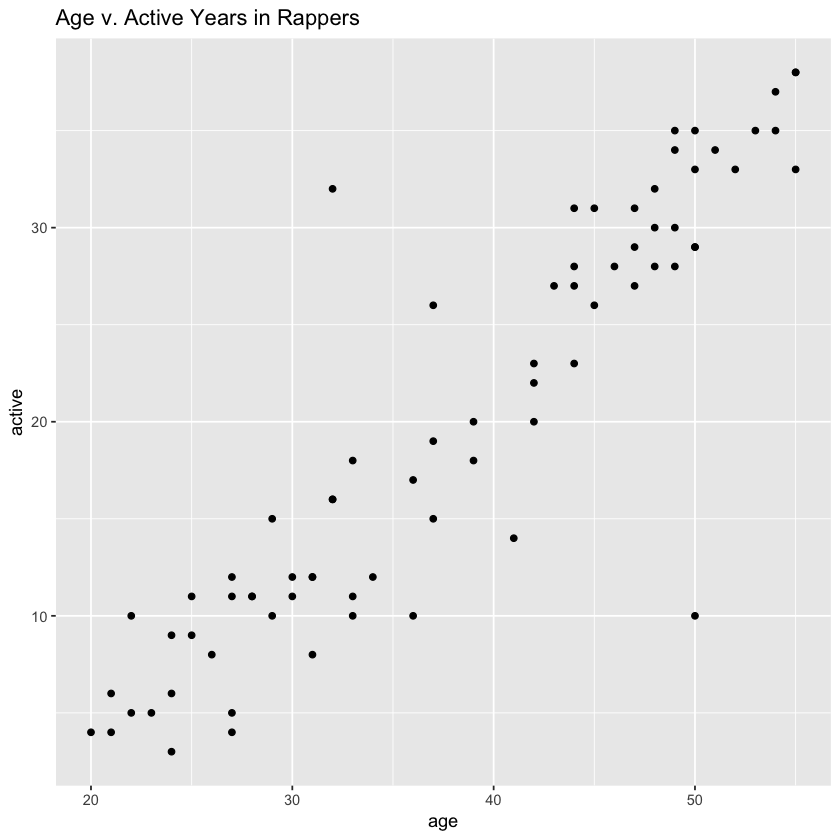

In [63]:
ggplot(rappers, aes(x=age, y=active)) +
    geom_point() +
    ggtitle("Age v. Active Years in Rappers")

And although it may not be the most splendid thing to look at, we can color in the data points that have to do with rappers that have passed away. This may give us some insight into which data points should be considered in our pattern making.

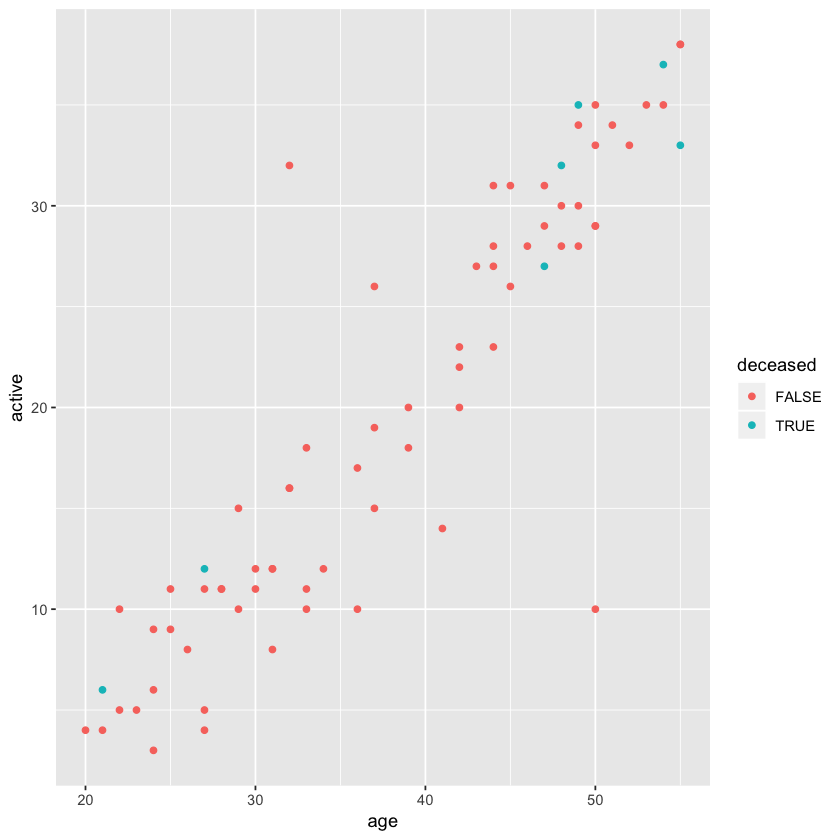

In [18]:
ggplot(rappers, aes(x=age, y=active, color=deceased)) +
    geom_point()

But taking it back to one color of dots, we can add in some sort of trend line to our data by using `geom_smooth()`. Notice that by default, the function is using some `method="loess"`. Without going too far into the math of it all, the loess method will draw a curve that follows the pattern of your data points by staying close enough to all of them at all times. (The machinery behind the method won't be tested!) The grey portion surrounding the blue line stands for the standard error (deviation) around the line estimate.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


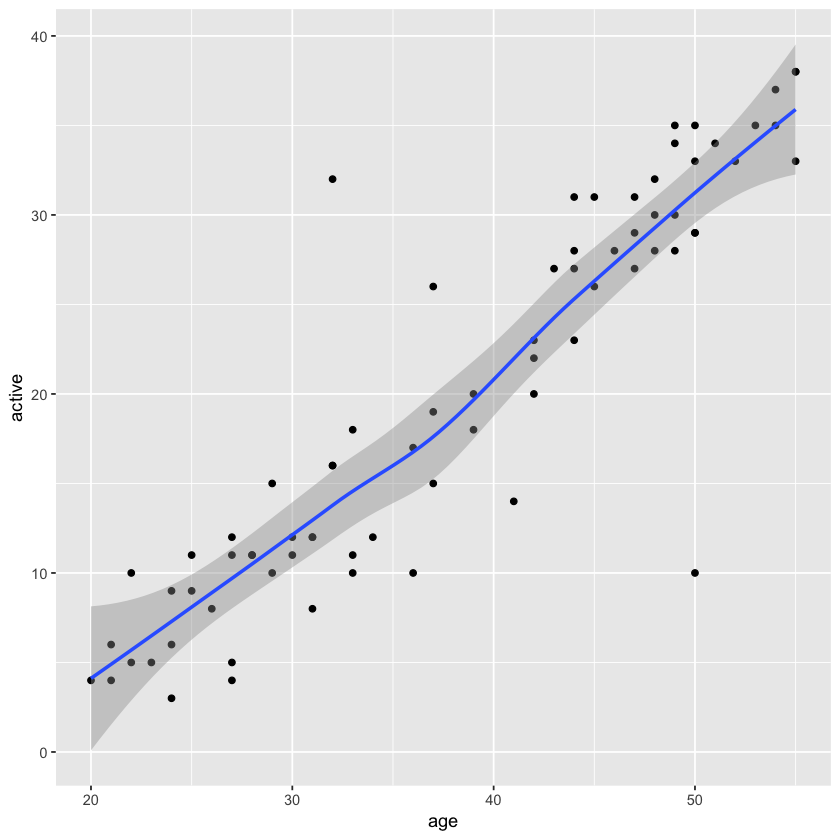

In [16]:
ggplot(rappers, aes(x=age, y=active)) +
    geom_point() +
    geom_smooth()

In this class, the most important smoothing method is `"lm"` which stands for linear model! If you set your method to `"lm"`, you'll notice that the line becomes straight. I turned `se=FALSE` because the seeing the error around the line gets a bit funky to look at sometimes.

**Later, we'll go over another way you can put a regression line on a graph.**

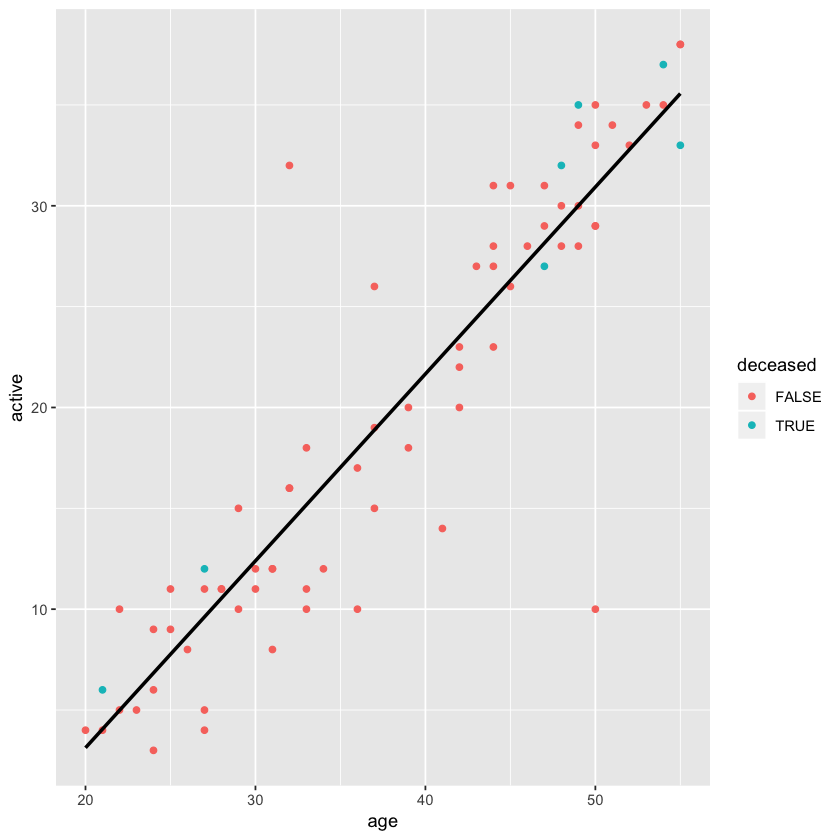

In [25]:
ggplot(rappers, aes(x=age, y=active, color=deceased)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE, color="black")

### Computing the linear regression model
We can write up our linear regression model using output from a handy dandy function called `lm()`, which again, stands for "linear model". The format for the `lm()` function is:

`lm(data=your_dataframe, your_y_variable~your_x_variable)`

I challenge you now to start thinking less in `x` and `y` and more in the realm of "independent" and "dependent".

In [53]:
model_1a <- lm(data=rappers, active~age)
model_1a


Call:
lm(formula = active ~ age, data = rappers)

Coefficients:
(Intercept)          age  
   -15.4073       0.9267  


We are going to use `tidy()` from the library `broom` to see some more information about our linear model.

In [55]:
tidy(model_1a)

term,estimate,std.error,statistic,p.value
(Intercept),-15.4072512,1.95330073,-7.887803,2.483196e-11
age,0.9267481,0.04935339,18.777798,1.850988e-29


From just the information about, we can write the linear regression equation!

$$
\begin{align}
y
&= b_o + b_1x
\\
&= -15.4073 + 0.9267x
\end{align}
$$

And as alluded to before, we can draw our regression line manually on top of our scatterplot. While using `geom_smooth()` works, sometimes you want some more control over what shows up on your plot. To demonstrate this, I'm going to add a random dotted line going across the plot as well.

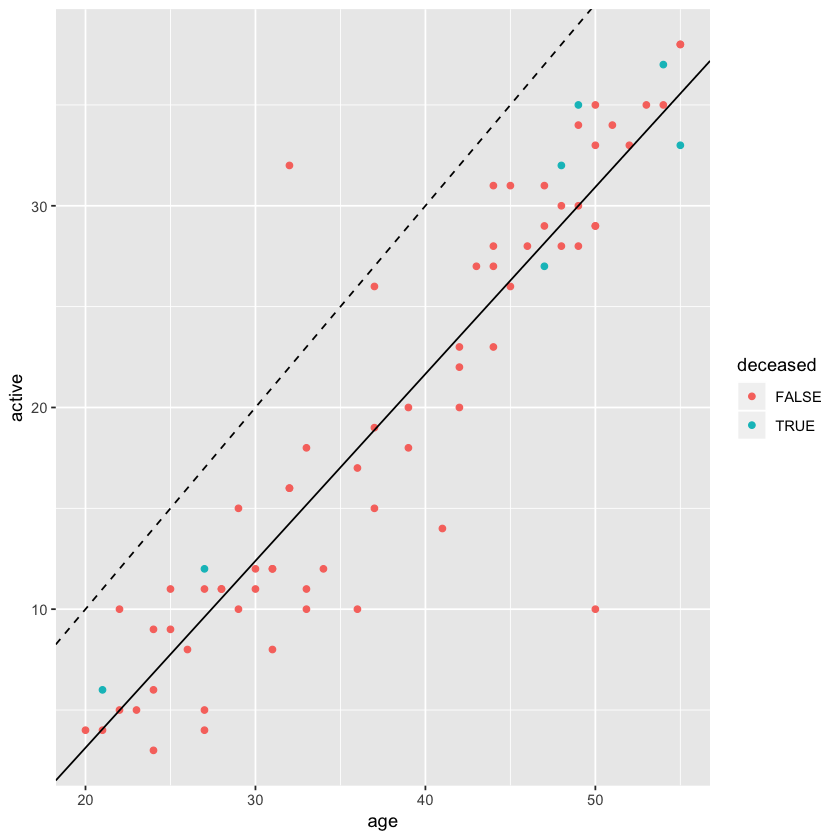

In [61]:
ggplot(rappers, aes(x=age, y=active, color=deceased)) +
    geom_point() +
    geom_abline(slope=0.9267481, intercept=-15.4072512) + # * THE REGRESSION LINE
    geom_abline(slope=1, intercept=-10, lty=2)            # * AND THE RANDOM LINE

### Correlation and $R^2$
<a href="https://stattrek.com/statistics/dictionary.aspx?definition=correlation">Correlation</a> is a measure of the strength of association between two variables. It is denoted as $\textbf{R}$. The <a href="https://towardsdatascience.com/coefficient-of-determination-r-squared-explained-db32700d924e">coefficient of determination $R^2$</a> is the square of correlation. Both $R$ and $R^2$ measure the goodness of fit of of your line to your data points. They <a href="http://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-is-the-difference-between-coefficient-of-determination-and-coefficient-of-correlation/">are different</a> in ways that are subtle to this course, but important to know.

Never fear: $R$ is correlation and $R^2$ is the coefficient of determination, and the notation is straightforward! Indeed, if we square correlation $R$, then we get $R^2$!

**In this document, I am writing correlation to be capital R just to prove a point. It is normally denoted by lowercase r or $\rho$, for the population correlation.**

In [66]:
rappers %>% summarize(correlation=cor(age, active),
                      correlation_sq=correlation^2)

correlation,correlation_sq
0.9112798,0.8304309


Two more functions you can use to look into your linear model are `summary()`, which is more base R, and `glance()`, which is (for the lack of a better expression) more hip. Take a look at values of "R-squared" in the summary of model 1a.

In [57]:
summary(model_1a)


Call:
lm(formula = active ~ age, data = rappers)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.930  -1.504   0.167   2.313  17.751 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.40725    1.95330  -7.888 2.48e-11 ***
age           0.92675    0.04935  18.778  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.454 on 72 degrees of freedom
Multiple R-squared:  0.8304,	Adjusted R-squared:  0.8281 
F-statistic: 352.6 on 1 and 72 DF,  p-value: < 2.2e-16


To measure our model's goodness of fit, we will look at $R^2$. The $R^2$ above says `Multiple R-squared:  0.8304`, as in $R^2=0.8304$. It's important to note that $R^2$ is a number between 0 and 1. A value of $R^2=1$ says that the data lie in a straight line. A value of $R^2=0$ means that the data show no association.

One property of $R^2$ shows that you can switch your independent and dependent variables and $R^2$ will remain the same. Check it out below. We're going to let age be the `y` variable this time.

In [62]:
model_1b <- lm(data=rappers, age~active)
glance(model_1b)

,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
value,0.8304309,0.8280758,4.379529,352.6057,1.850988e-29,2,-213.2813,432.5627,439.4749,1380.98,72


As we suspected, $R^2=0.8304309$.

## Some not so clean examples
Not all data is suitable to draw a line through. We have to be reasonable when drawing a line through a graph, especially since we technically are trying to predict for values. We cannot predict new values from a line that doesn't follow the pattern of our existing dataset.

### Bad Example 1
Remember that `facet_wrap()` can separate data based on some categorical variable in your dataset. Here, we're separating by state of origin. Look at the graphs below. Notice that putting a linear model on a lot of them doesn't look quite helpful in describing the association between the variables.

The California graph doesn't really look linear. It looks like there are two clusters instead, which a line cannot describe. Several of these graphs include only 1 or 2 data points. We shouldn't be making predictions off of just two data points in the first place, so don't do a regression on those in practice either!

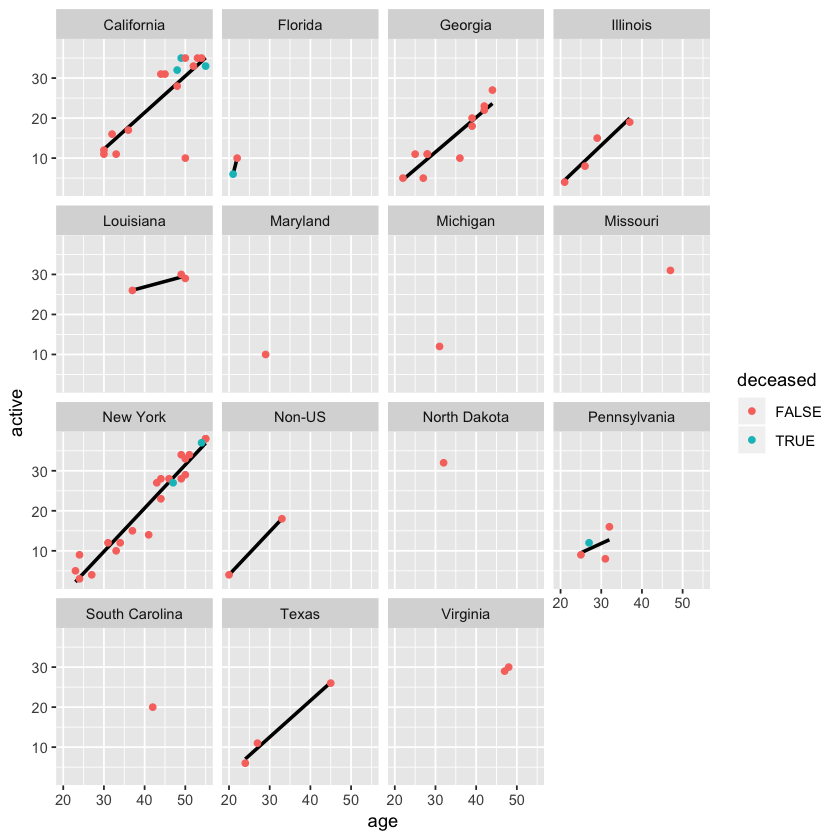

In [67]:
ggplot(rappers, aes(x=age, y=active, color=deceased)) +
    geom_smooth(method="lm", se=FALSE, color="black") +
    geom_point() +
    facet_wrap(~origin)

### Bad Example 2
Here's another plot that is not so helpful. it plots age versus height. From the get go, the data look like "random scatter", so we cannot assume a shape/pattern!

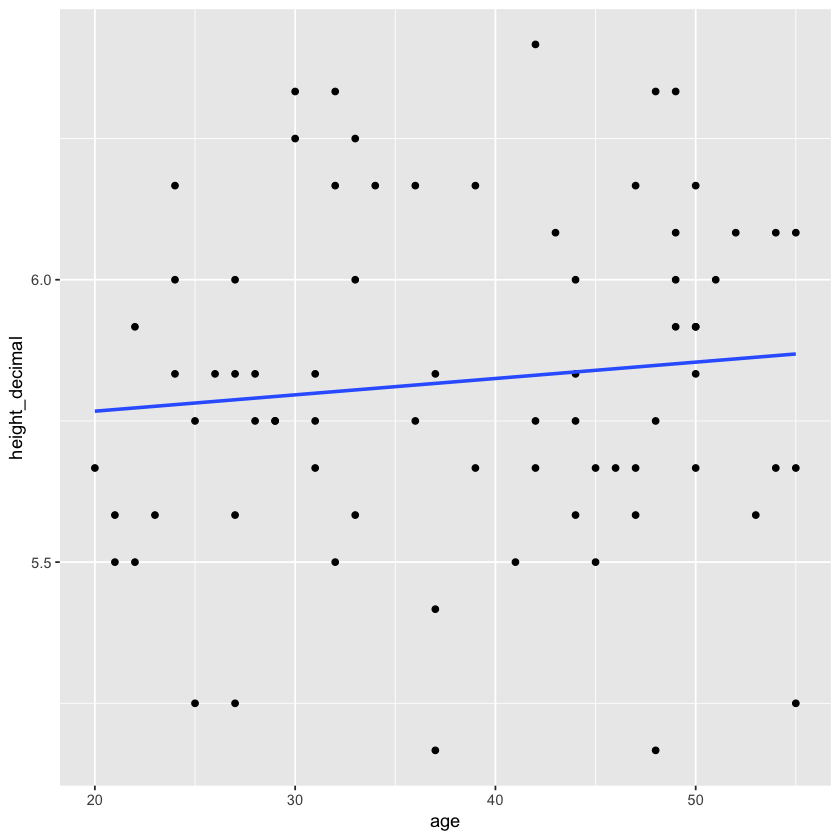

In [21]:
ggplot(rappers, aes(x=age, y=height_decimal)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

Notice how low the $R^2$ value is!

In [69]:
model_2 <- lm(data=rappers, height_decimal~age)
glance(model_2)

,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
value,0.01070775,-0.003032424,0.2959708,0.7793023,0.3802926,2,-13.89311,33.78622,40.69842,6.307109,72


### Bad Example 3
Not all rappers are making the same money. In fact, four of the rappers we have included in our dataset are making  bank with a net worth of $750 million dollars or more. We can check if they're statistical outliers via boxplot. According to the below boxplot, 9 artists' net worths are outliers!

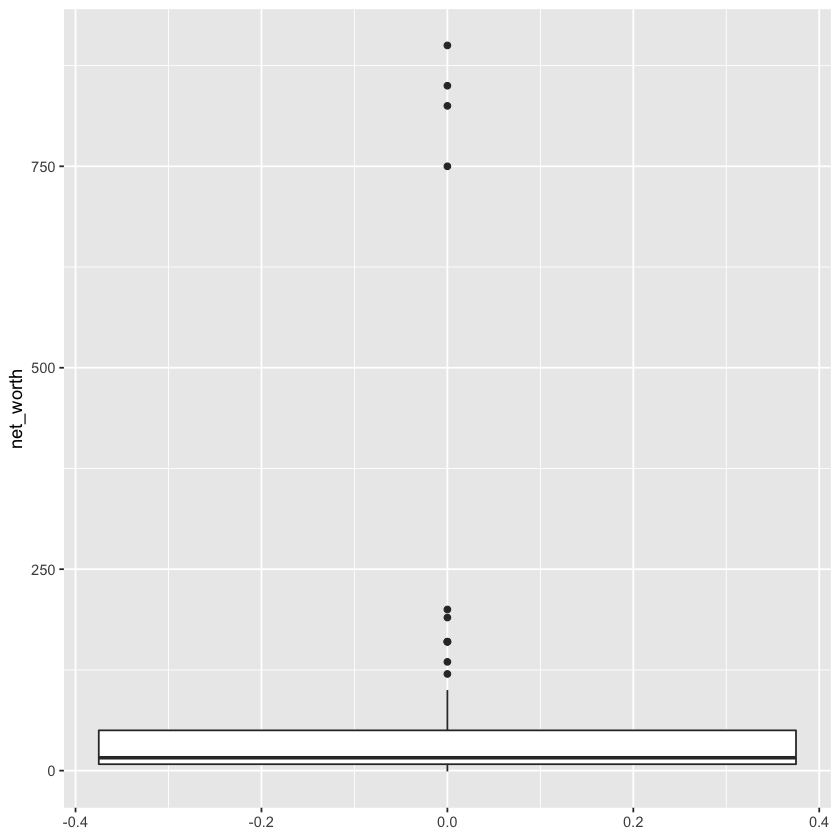

In [70]:
ggplot(rappers, aes(y=net_worth)) +
    geom_boxplot()

**These outliers happen to be influential points.** They pull the line of best fit away from the other points because linear regression uses means, and means are not robust measures of centrality! (Outliers will pull the mean away from the median. Recall skewness!)

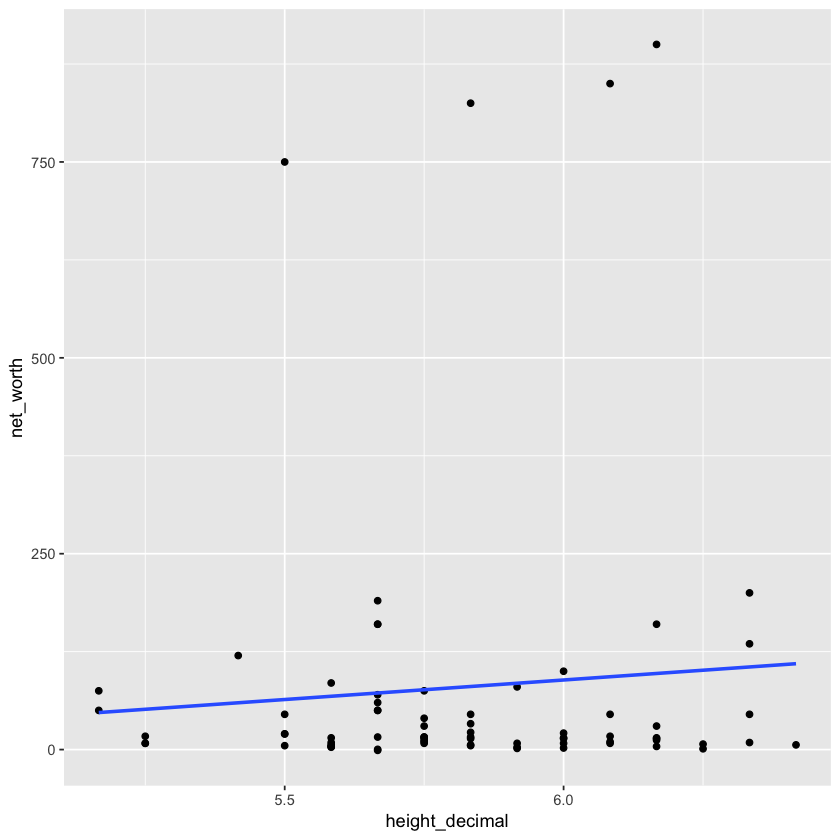

In [31]:
ggplot(rappers, aes(x=height_decimal, y=net_worth)) +
    geom_point() +
    geom_smooth(method="lm", se=FALSE)

I'm practicing a little subjectivity and removing artists worth $750 million or more (this sounds rude, but I don't want to be that way; no life is worth a cash value in my heart) by using `filter()`.

In [44]:
less_than_750 <- rappers %>% filter(net_worth<750)

We started off with a dataset of 74 rappers. We have successfully removed four. We can check by using `dim()`.

In [45]:
dim(less_than_750)

[1] 70 11

When we scatterplot these data, notice that our scale changes a lot on the y-axis. It looks to me as though we shouldn't be plotting height against net worth. It doesn't make sense in general, but as well as on the plot! However, we can just go ahead and plot the points below to show that we can't see patterns.

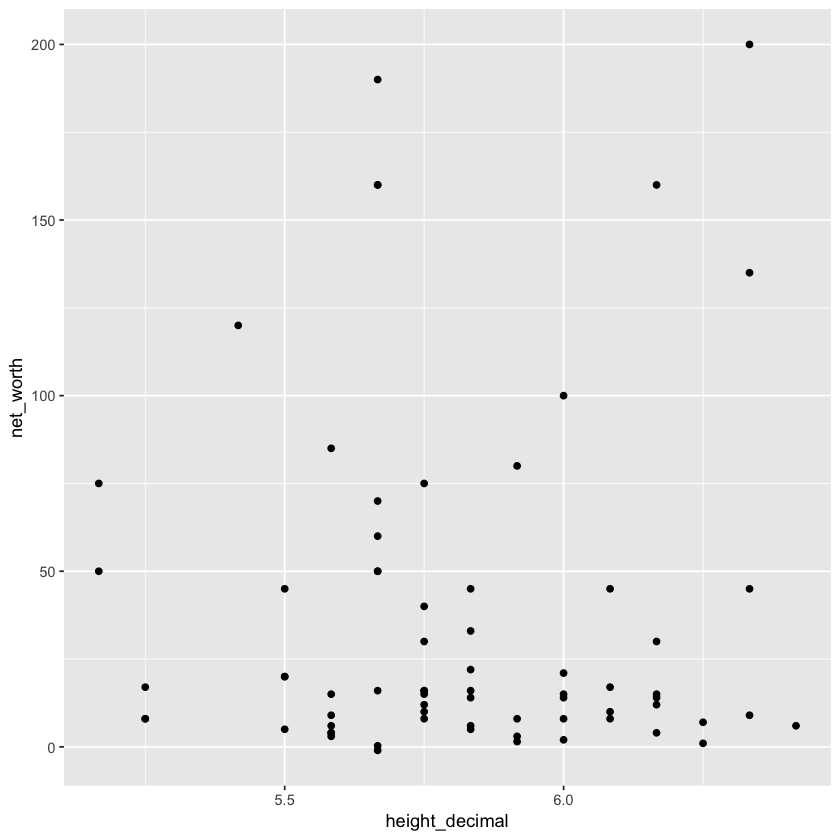

In [75]:
ggplot(less_than_750, aes(x=height_decimal, y=net_worth)) +
    geom_point() 

**Something I didn't go over is transformations.** Sometimes, you'll want to transform your data so that it may look more linear. You'd want to do this if you start seeing a pattern in your data that you think you can remove by applying a function. In this case, I didn't see it, so I didn't want to apply a function.